## **1.Carregar o Dataset**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar o dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat"
columns = ['age', 'sex', 'chest_pain', 'resting_bp', 'cholesterol', 'blood_sugar', 'rest_ecg',
           'max_heart_rate', 'exercise_angina', 'oldpeak', 'slope', 'vessels', 'thal', 'target']

# Carregar o dataset com os nomes das colunas
df = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)

# Separar as features e o alvo
X = df.drop('target', axis=1)
y = df['target']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/tmp/ipykernel_134228/2632724401.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)


In [2]:
#mostrar o dataset lido
df

,age,sex,chest_pain,resting_bp,cholesterol,blood_sugar,rest_ecg,max_heart_rate,exercise_angina,oldpeak,slope,vessels,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


## **2. Treinar os Modelos**

Treinando os três modelos de classificação: k-Nearest Neighbors (kNN), Random Forest e Decision Tree.


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### **2.1 Computar Permutation Feature Importance (PFI)**

O Permutation Feature Importance pode ser calculado (de acordo com o livro) embaralhando uma feature e verificando como a acurácia do modelo diminui.

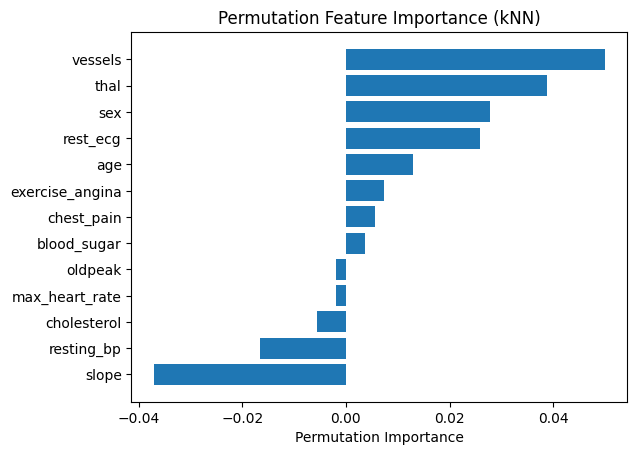

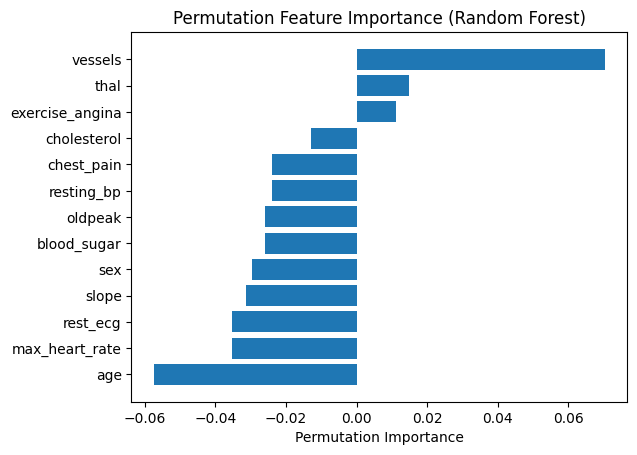

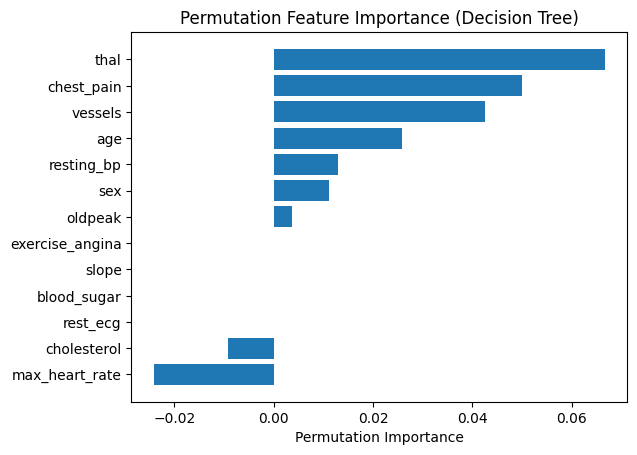

In [4]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Função para calcular e plotar Permutation Feature Importance
def plot_pfi(model, X_test, y_test, model_name):
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    sorted_idx = result.importances_mean.argsort()

    plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
    plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
    plt.xlabel("Permutation Importance")
    plt.title(f"Permutation Feature Importance ({model_name})")
    plt.show()

# Computar e plotar PFI para cada modelo
plot_pfi(knn, X_test, y_test, "kNN")
plot_pfi(rf, X_test, y_test, "Random Forest")
plot_pfi(dt, X_test, y_test, "Decision Tree")


### **2.2 Avaliando os Modelos**
Avalia-se o desempenho dos modelos usando métricas como acurácia e outras métricas comuns.



In [5]:
from sklearn.metrics import accuracy_score

# Predições no conjunto de teste
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)

# Calcular a acurácia
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Acurácia do kNN: {accuracy_knn:.2f}")
print(f"Acurácia do Random Forest: {accuracy_rf:.2f}")
print(f"Acurácia do Decision Tree: {accuracy_dt:.2f}")


Acurácia do kNN: 0.81
Acurácia do Random Forest: 0.76
Acurácia do Decision Tree: 0.69


### **2.3 Comentários**

Note que o `k-Nearest Neighbors` (kNN) apresentou a maior acurácia, 0.81, sugerindo que esse modelo foi o mais eficaz para classificar corretamente os dados no conjunto de teste. Como o kNN é um modelo baseado em distâncias, ele geralmente se beneficia de uma boa separação nos dados, especialmente quando há features que diferenciam bem as classes.

Para o kNN, a feature mais importante foi `"vessels"`, com um PFI acima de 0.4. Isso significa que a quantidade de vasos sanguíneos observada em exames é crucial para determinar a probabilidade de uma pessoa ter ou não problemas cardíacos nesse dataset. No contexto do kNN, isso sugere que as distâncias entre instâncias são fortemente influenciadas por essa feature.

Já o Random Forest teve uma acurácia de 0.76, o que é ligeiramente inferior ao kNN. Random Forest é um modelo baseado em múltiplas árvores de decisão e pode ter desempenho ligeiramente inferior quando os dados não têm muitas relações complexas entre features que possam ser capturadas por várias divisões. O fato de o kNN ter superado o Random Forest sugere que a estrutura espacial dos dados (distância entre os pontos) é mais importante do que as interações não-lineares entre as features.

No `Random Forest`, a feature `"vessels"` teve uma importância maior também, com PFI acima de 0.6. Isso indica que, ao fazer múltiplas divisões nos dados, a informação sobre vasos sanguíneos foi consistentemente relevante para a previsão do modelo. Como Random Forest mede a importância de cada feature ao longo de várias árvores, isso confirma que "vessels" tem uma influência geral significativa no modelo.

Por fim, a acurácia do `Decision Tree` foi a menor entre os três modelos, com 0.69. Isso pode acontecer porque árvores de decisão simples tendem a sofrer de overfitting, capturando ruído nos dados. A estrutura hierárquica de uma única árvore pode não ser suficiente para capturar toda a variabilidade dos dados.
No Decision Tree, a feature mais importante foi `"thal"`, com um PFI acima de 0.6. "Thal" se refere à talassemia, uma condição genética que afeta a produção de hemoglobina. A alta importância dessa feature sugere que o modelo de árvore tomou decisões significativas com base nessa característica específica. Como as árvores de decisão fazem divisões com base na separação mais eficiente dos dados, "thal" provavelmente foi usada para criar divisões cruciais no modelo, levando a uma grande diferença na performance quando a feature foi embaralhada.

## **3. Criando um gráfico PFI para cada gênero.**

Separamos por gênero (masculino e feminino), podemos escolher um dos modelos que já treinamos, por exemplo, o Random Forest, e seguir o processo descrito abaixo:


#### 3.1 Dividir o Conjunto de Teste por Gênero

Primeiramente, separamos os dados de teste entre `masculino` e `feminino`.No dataset `Statlog Heart`, a coluna sex se codifica o gênero como:
- `0` para feminino,
- `1` para masculino.

In [6]:
# Adicionar a coluna "sex" ao X_test para a filtragem
X_test_with_gender = pd.DataFrame(X_test, columns=X.columns)
X_test_with_gender['sex'] = X.iloc[y_test.index]['sex']

# Separar os dados de teste por gênero
X_test_male = X_test_with_gender[X_test_with_gender['sex'] == 1]
X_test_female = X_test_with_gender[X_test_with_gender['sex'] == 0]
y_test_male = y_test[X_test_with_gender[X_test_with_gender['sex'] == 1].index]
y_test_female = y_test[X_test_with_gender[X_test_with_gender['sex'] == 0].index]


#### 3.2 Executar PFI para Cada Gênero
Agora, vamos calcular e plotar o Permutation Feature Importance para o modelo Random Forest, uma vez para cada subconjunto de gênero.

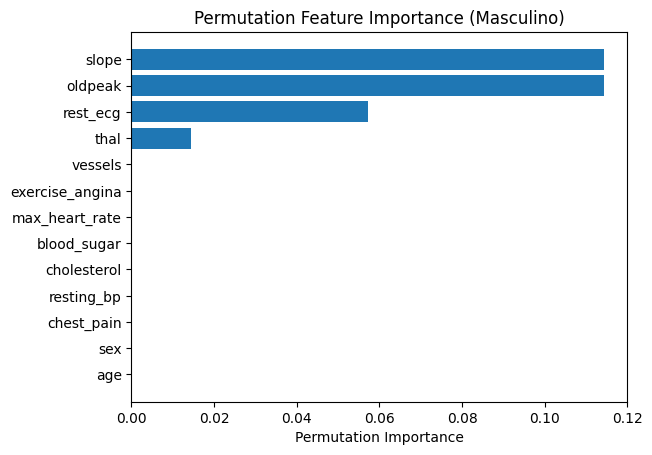

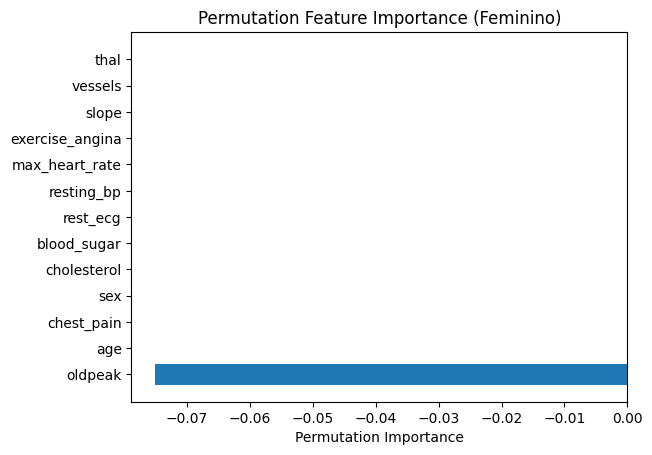

In [7]:
# Converter X_test_male e X_test_female em NumPy array
X_test_male = X_test_male.values
X_test_female = X_test_female.values

def plot_pfi_by_gender(model, X_test, y_test, gender):
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    sorted_idx = result.importances_mean.argsort()

    plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
    plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
    plt.xlabel("Permutation Importance")
    plt.title(f"Permutation Feature Importance ({gender})")
    plt.show()

# PFI para homens
plot_pfi_by_gender(rf, X_test_male, y_test_male, "Masculino")

# PFI para mulheres
plot_pfi_by_gender(rf, X_test_female, y_test_female, "Feminino")


Com base no gráfico de **Permutation Feature Importance (PFI)** para o gênero masculino, podemos fazer a seguinte análise:

### Interpretação das Features Importantes:

1. **Slope** (Importância ~0.12):
   - O **slope** (inclinação do segmento de pico do exercício) foi a feature mais importante para o modelo ao prever doenças cardíacas em homens. A alta importância dessa feature sugere que as mudanças no eletrocardiograma durante o exercício físico (ou teste de esforço) são um dos principais indicadores da condição cardíaca nesse grupo.

2. **Oldpeak** (Importância ~0.12):
   - **Oldpeak** refere-se à depressão do segmento ST no ECG (diferença em milímetros entre a linha de base e o ponto mais baixo após o pico). Uma importância similar à do **slope** indica que a depressão do segmento ST após o exercício também é um forte preditor de problemas cardíacos em homens.

3. **Rest_ecg** (Importância ~0.08):
   - O **rest_ecg** (resultados do ECG em repouso) é outra feature importante. A variação dos sinais do coração quando o paciente está em repouso é um bom indicativo para o diagnóstico em homens, porém menos impactante que as duas primeiras features.

4. **Thal** (Importância ~0.04):
   - **Thal** se refere à condição de talassemia, que também teve relevância na classificação do modelo, embora menor do que as três primeiras features. Isso sugere que a presença de condições ligadas à talassemia pode influenciar o diagnóstico, mas não de forma tão acentuada quanto as outras variáveis.

5. **Vessels** (Importância ~0.02):
   - O número de vasos principais coloridos pela fluoroscopia (**vessels**) tem uma leve importância. Isso indica que a presença ou ausência de bloqueios nos vasos pode ajudar na decisão, mas é um fator menos relevante em comparação com os indicadores elétricos do coração, como o ECG.

### Interpretação Geral:
- As features mais importantes para homens são principalmente associadas a medições obtidas durante ou após o exercício físico (**slope** e **oldpeak**), sugerindo que os homens podem ter respostas cardíacas durante atividades físicas que são fortes preditores de doenças cardíacas.
- Fatores relacionados ao eletrocardiograma em repouso (**rest_ecg**) também têm um impacto considerável, mas ligeiramente menor.
- Outras condições médicas como talassemia (**thal**) e o número de vasos afetados (**vessels**) também contribuem, mas de forma menos expressiva.

Já para o gênero feminino, percebemos que apenas a feature `oldpeak` se sobre-saiu em relaćao as demais, mas com valor negativo, isso quer dizer que ela não possui muita importancia para o modeloe como já explicado refere-se à depressão do segmento ST no ECG.